In [2]:
# Imports iniciales
%matplotlib inline
from common import *
from tree import *

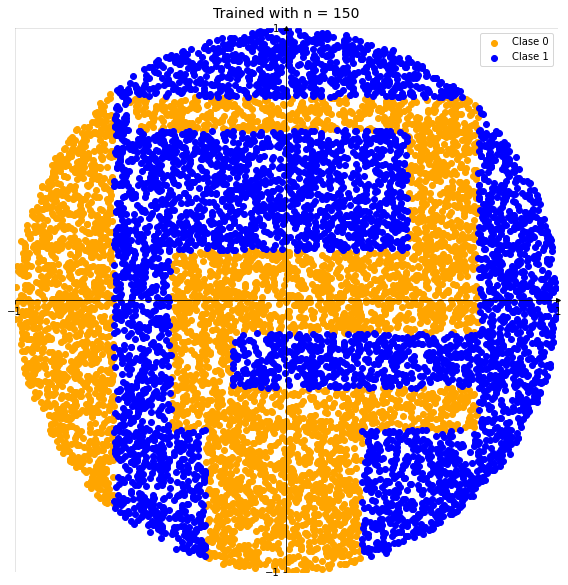

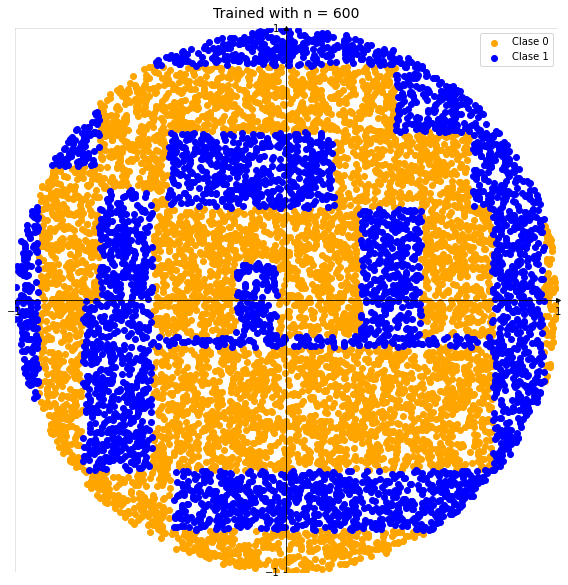

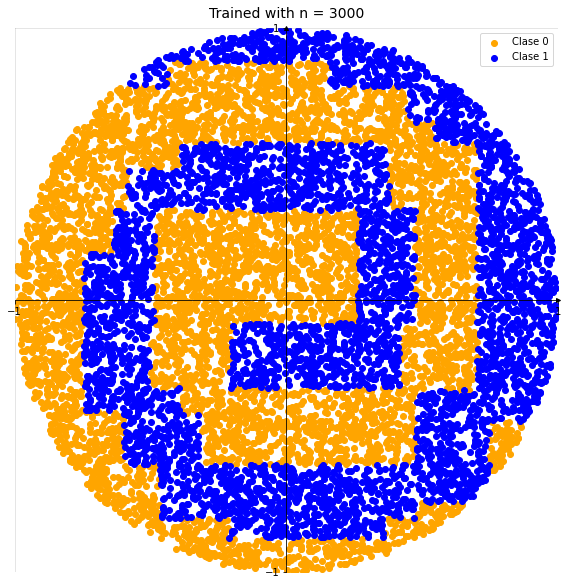

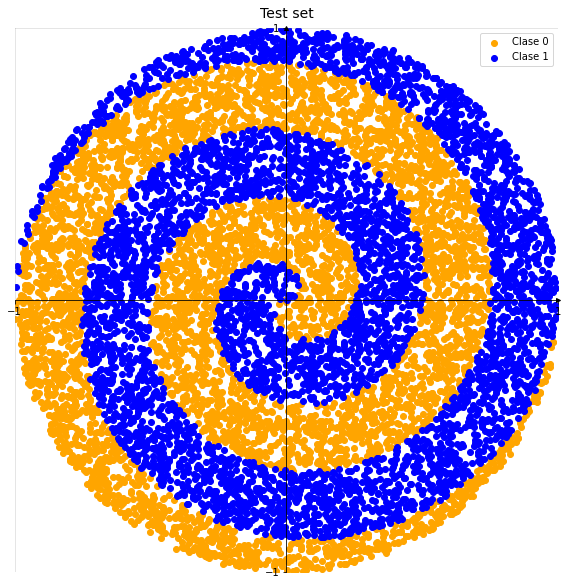

In [3]:
# Ejercicio 1
# Genero los datos de entrenamiento
df_train_spirals_150 = generate_spirals(150)
df_train_spirals_600 = generate_spirals(600)
df_train_spirals_3000 = generate_spirals(3000)
# Genero el conjunto de test
df_test_spirals_10000 = generate_spirals(10000)

# Entreno los árboles correspondientes
clf_spiral_150 = train_tree(df_train_spirals_150)
clf_spiral_600 = train_tree(df_train_spirals_600)
clf_spiral_3000 = train_tree(df_train_spirals_3000)

# Predigo
predict_spiral_150 = predict_tree(df_test_spirals_10000, clf_spiral_150)
predict_spiral_600 = predict_tree(df_test_spirals_10000, clf_spiral_600)
predict_spiral_3000 = predict_tree(df_test_spirals_10000, clf_spiral_3000)

# Grafico los resultados de las predicciones
graph_df(predict_spiral_150, "Trained with n = 150")
graph_df(predict_spiral_600, "Trained with n = 600")
graph_df(predict_spiral_3000, "Trained with n = 3000")
# También grafico el conjunto de test original para comparar los resultados con lo esperado
graph_df(df_test_spirals_10000, "Test set")

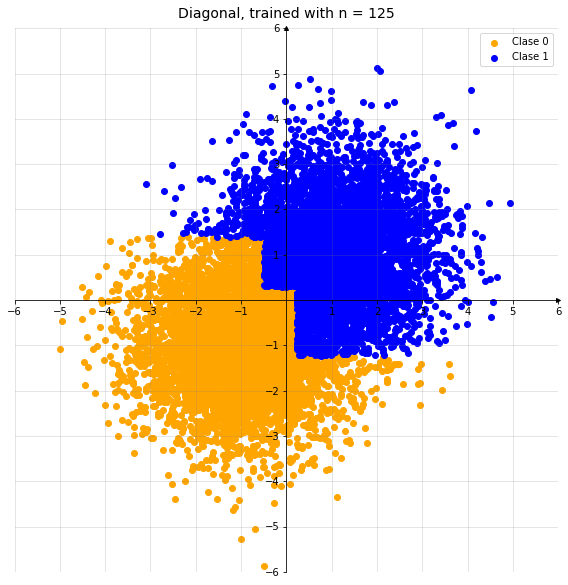

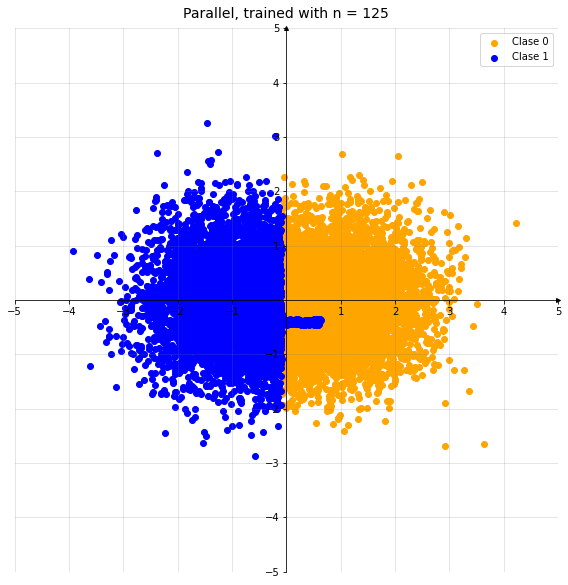

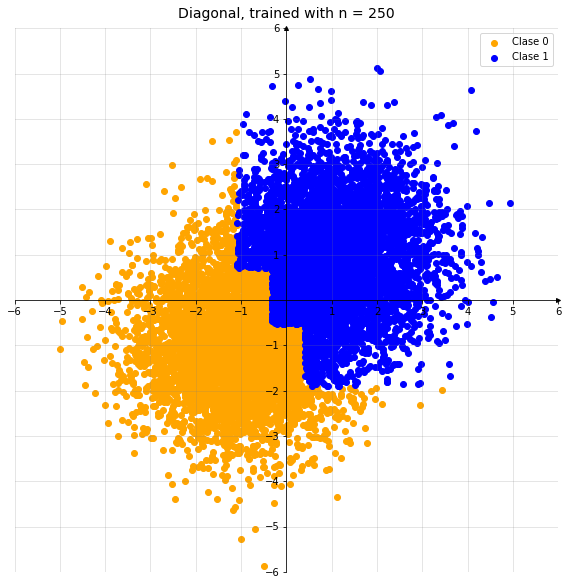

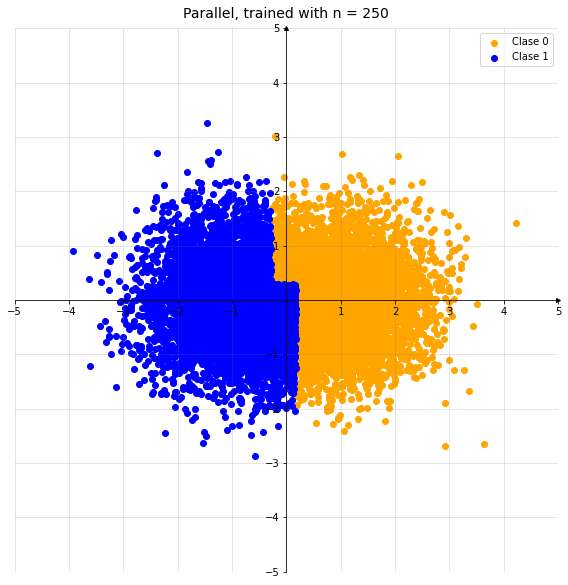

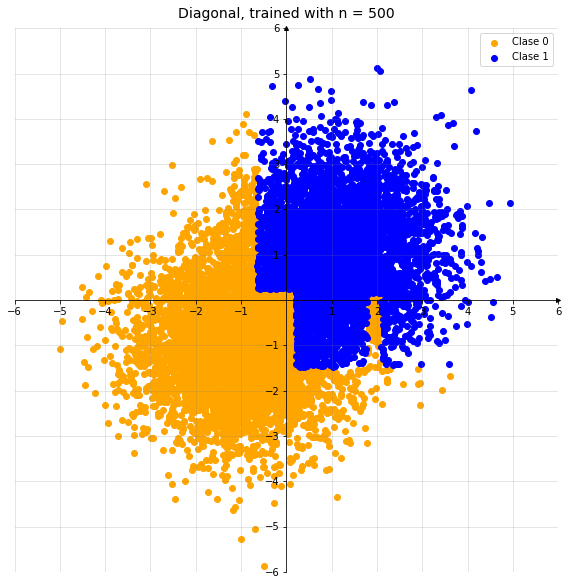

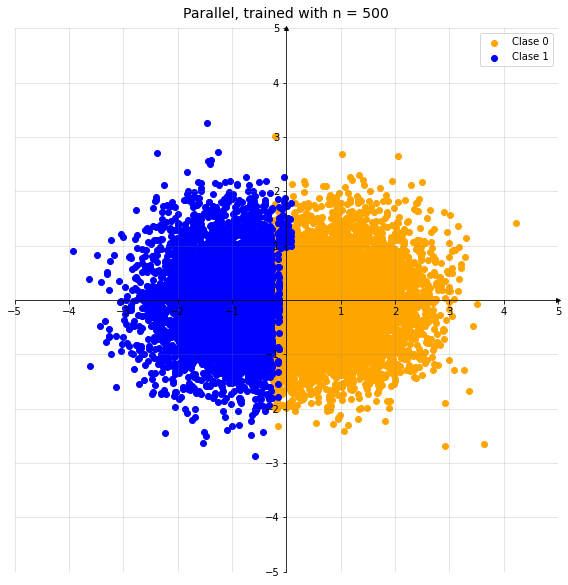

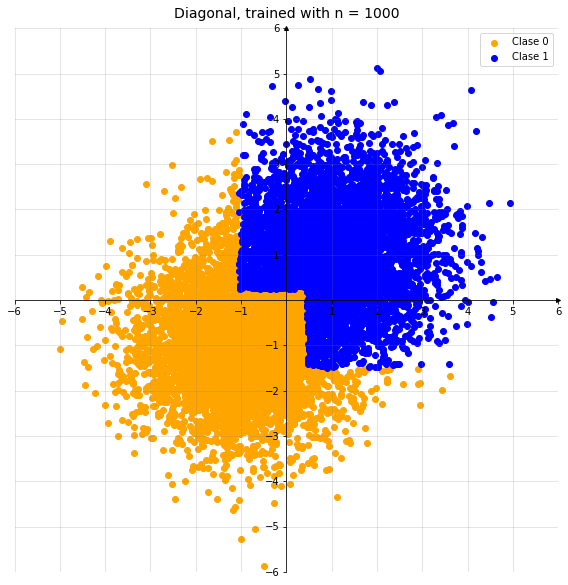

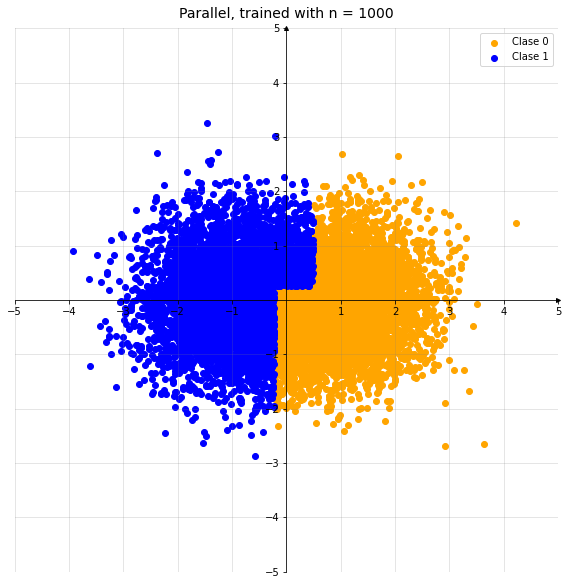

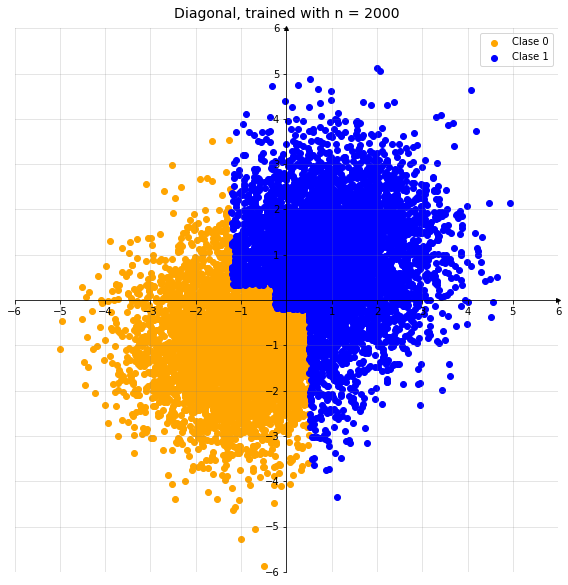

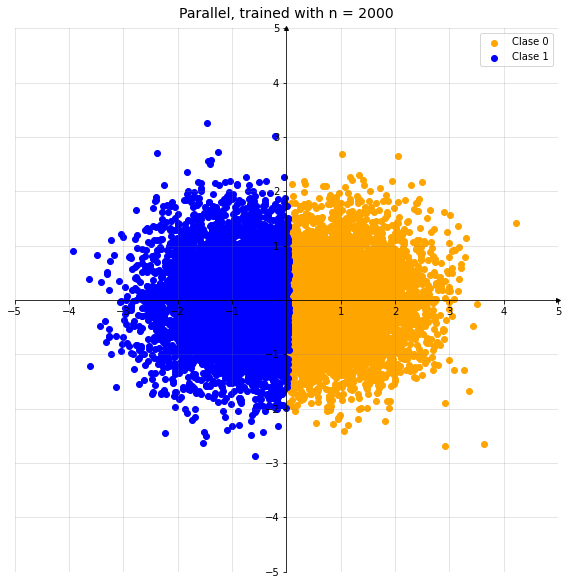

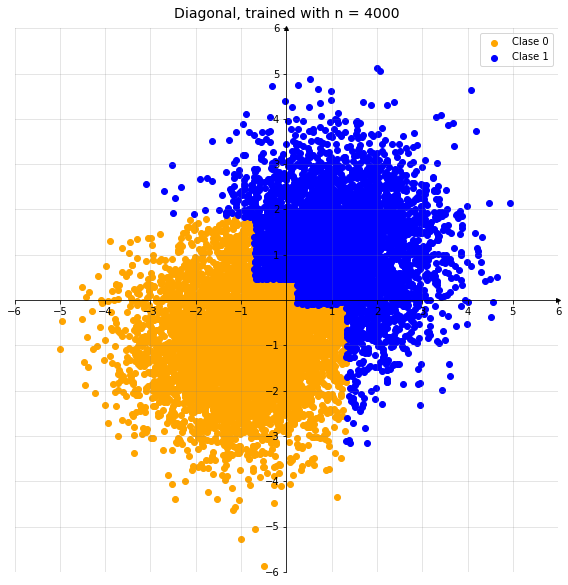

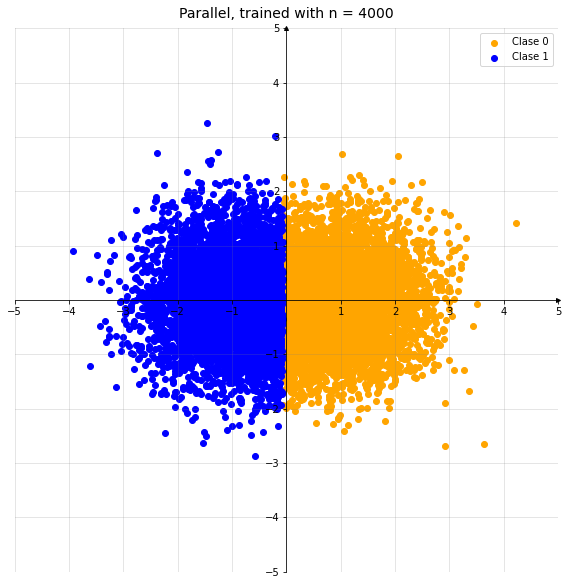

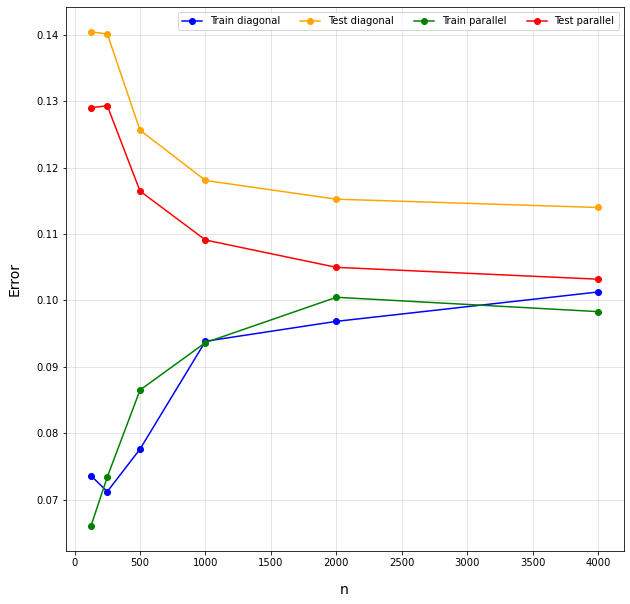

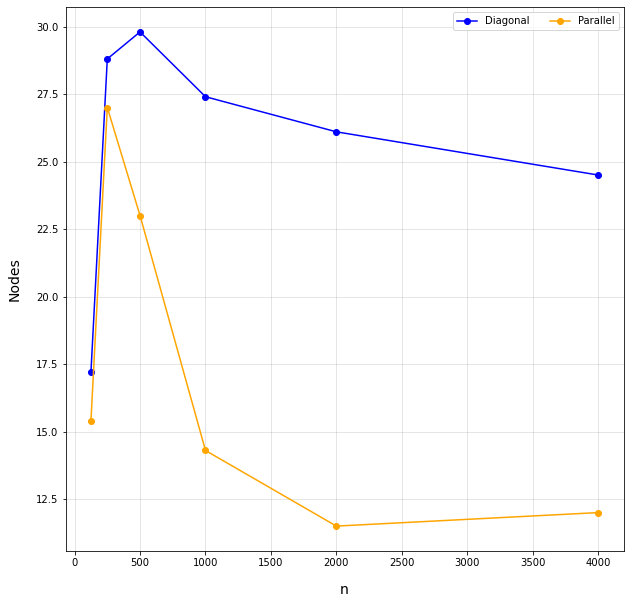

In [4]:
# Ejercicio 2
# Genero los conjuntos de test
df_test_diagonal_10000 = generate_diagonal(2, 10000, 0.78)
df_test_parallel_10000 = generate_parallel(2, 10000, 0.78)

n_points = [125, 250, 500, 1000, 2000, 4000]

errors = []
nodes_counts = []

for n in n_points:
  for i in range(20):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(2, n, 0.78)
    df_train_para = generate_parallel(2, n, 0.78)
    
    # Entreno los árboles
    clf_diag = train_tree(df_train_diag)
    clf_para = train_tree(df_train_para)
    
    # Predigo sobre los conjunto de test y los de entrenamiento
    predict_train_diag = predict_tree(df_train_diag, clf_diag)
    predict_test_diag = predict_tree(df_test_diagonal_10000, clf_diag)
    predict_train_para = predict_tree(df_train_para, clf_para)
    predict_test_para = predict_tree(df_test_parallel_10000, clf_para)

    # Calculo los errores
    errors.append([1 - accuracy_score(df_train_diag['Class'], predict_train_diag['Class']), n, "Train diagonal"])
    errors.append([1 - accuracy_score(df_test_diagonal_10000['Class'], predict_test_diag['Class']), n, "Test diagonal"])
    errors.append([1 - accuracy_score(df_train_para['Class'], predict_train_para['Class']), n, "Train parallel"])
    errors.append([1 - accuracy_score(df_test_parallel_10000['Class'], predict_test_para['Class']), n, "Test parallel"])

    # Calculo la cuenta de nodos para el arbol
    nodes_counts.append([clf_diag.tree_.node_count, n, "Diagonal"])
    nodes_counts.append([clf_para.tree_.node_count, n, "Parallel"])

  # Grafico fuera del loop sobre i para graficar solo los últimos resultados de cada n
  graph_df(predict_test_diag, "Diagonal, trained with n = " + str(n))
  graph_df(predict_test_para, "Parallel, trained with n = " + str(n))

# Creo los dataframes con los errores y conteos de nodos
ej2_errors_df = pd.DataFrame(errors, columns = ["Error", "n", "Class"])
ej2_nodes_counts_df = pd.DataFrame(nodes_counts, columns = ["Nodes", "n", "Class"])

graph_errors(ej2_errors_df, 'n')
graph_nodes_count(ej2_nodes_counts_df)

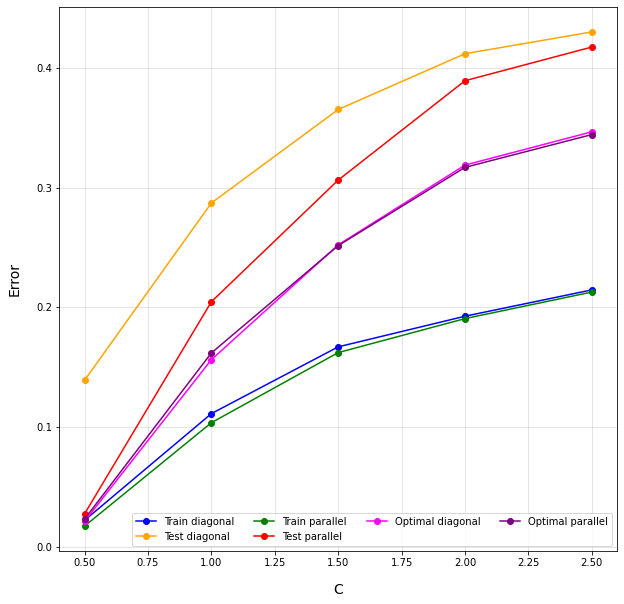

In [5]:
# Ejercicio 3

errors = []
nodes_counts = []

for C in np.arange(0.5, 3, 0.5):
  # Genero los conjuntos de test
  df_test_diagonal_10000 = generate_diagonal(5, 10000, C)
  df_test_parallel_10000 = generate_parallel(5, 10000, C)

  for i in range(20):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(2, 250, C)
    df_train_para = generate_parallel(2, 250, C)
    
    # Entreno los árboles
    clf_diag = train_tree(df_train_diag)
    clf_para = train_tree(df_train_para)
    
    # Predigo sobre los conjunto de test y los de entrenamiento
    predict_train_diag = predict_tree(df_train_diag, clf_diag)
    predict_test_diag = predict_tree(df_test_diagonal_10000, clf_diag)
    predict_train_para = predict_tree(df_train_para, clf_para)
    predict_test_para = predict_tree(df_test_parallel_10000, clf_para)
    optimal_diag = optimal_diagonal(df_test_diagonal_10000, 5)
    optimal_para = optimal_parallel(df_test_parallel_10000, 5)

    # Calculo los errores
    errors.append([1 - accuracy_score(df_train_diag['Class'], predict_train_diag['Class']), C, "Train diagonal"])
    errors.append([1 - accuracy_score(df_test_diagonal_10000['Class'], predict_test_diag['Class']), C, "Test diagonal"])
    errors.append([1 - accuracy_score(df_train_para['Class'], predict_train_para['Class']), C, "Train parallel"])
    errors.append([1 - accuracy_score(df_test_parallel_10000['Class'], predict_test_para['Class']), C, "Test parallel"])
    errors.append([1 - accuracy_score(df_test_diagonal_10000['Class'], optimal_diag['Class']), C, "Optimal diagonal"])
    errors.append([1 - accuracy_score(df_test_parallel_10000['Class'], optimal_para['Class']), C, "Optimal parallel"])

# Creo el dataframes con los errores
ej3_errors_df = pd.DataFrame(errors, columns = ["Error", "C", "Class"])

graph_errors(ej3_errors_df, 'C')

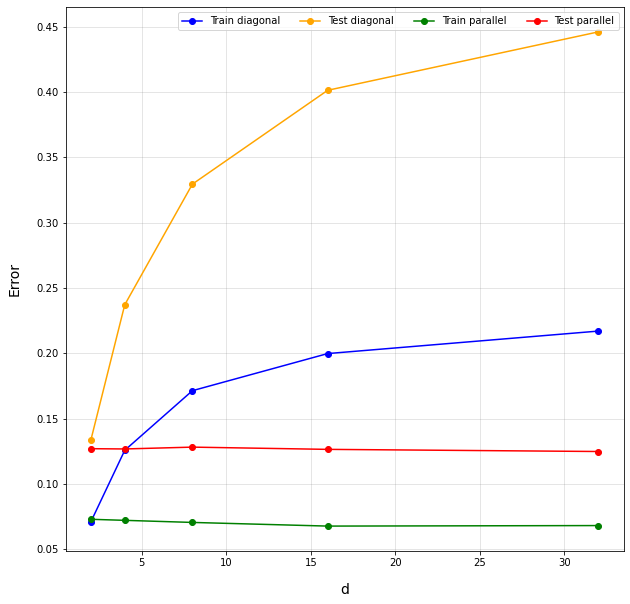

In [6]:
# Ejercicio 4
errors = []

for d in [2 ** i for i in range(1, 6)]:
  # Genero los conjuntos de test
  df_test_diagonal_10000 = generate_diagonal(d, 10000, 0.78)
  df_test_parallel_10000 = generate_parallel(d, 10000, 0.78)

  for i in range(20):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(d, 250, 0.78)
    df_train_para = generate_parallel(d, 250, 0.78)
    
    # Entreno los árboles
    clf_diag = train_tree(df_train_diag)
    clf_para = train_tree(df_train_para)
    
    # Predigo sobre los conjunto de test y los de entrenamiento
    predict_train_diag = predict_tree(df_train_diag, clf_diag)
    predict_test_diag = predict_tree(df_test_diagonal_10000, clf_diag)
    predict_train_para = predict_tree(df_train_para, clf_para)
    predict_test_para = predict_tree(df_test_parallel_10000, clf_para)

    # Calculo los errores
    errors.append([1 - accuracy_score(df_train_diag['Class'], predict_train_diag['Class']), d, "Train diagonal"])
    errors.append([1 - accuracy_score(df_test_diagonal_10000['Class'], predict_test_diag['Class']), d, "Test diagonal"])
    errors.append([1 - accuracy_score(df_train_para['Class'], predict_train_para['Class']), d, "Train parallel"])
    errors.append([1 - accuracy_score(df_test_parallel_10000['Class'], predict_test_para['Class']), d, "Test parallel"])

# Creo el dataframes con los errores
ej4_errors_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])

graph_errors(ej4_errors_df, "d")

Error de predecir sobre el árbol obtenido: 0.5


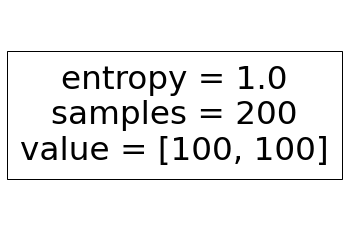

In [7]:
# Ejercicio 5
df_xor = pd.read_csv("xor.csv", header=None, names=[0, 1, 'Class'])

clf_xor = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)
clf_xor.fit(df_xor[[0, 1]], df_xor['Class'])
tree.plot_tree(clf_xor)
predict_xor = predict_tree(df_xor, clf_xor)

print("Error de predecir sobre el árbol obtenido:", 1 - accuracy_score(df_xor['Class'], predict_xor['Class']))